# Analysis of Cycling Data
##  Name : Thanh Trung Nguyen


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline
import seaborn as sns



## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

If the below cell gives error in `tz_localize`, use `tz_convert` as Pandas is time zone aware. 

In [70]:
strava = pd.read_csv('/mnt/data/strava_cleaned.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_localize(None).tz_convert('UTC')
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [5]:
cheetah = pd.read_csv('/mnt/data/cheetah_cleaned.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


The GoldenCheetah data contains many many variables (columns) and we won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

In [105]:
combined = strava.join(cheetah, how ='inner')
combined.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-01-31 21:13:34+00:00,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


## Remove Rides with no measured power

In [106]:
combined_clean = combined.drop(combined.index[combined.device_watts == False if isinstance(combined.device_watts.iloc[0], bool) else combined.device_watts == 'False'])
combined_clean.head()


,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780
2018-02-09 19:18:03+00:00,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,0,0,0,0,212.726,0.79375,147.7970


## Key Variables 

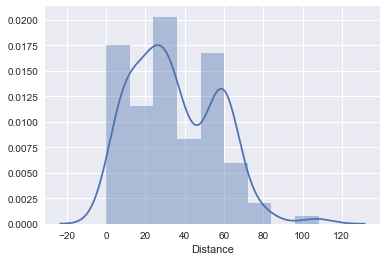

In [107]:
sns.distplot(combined_clean.Distance)

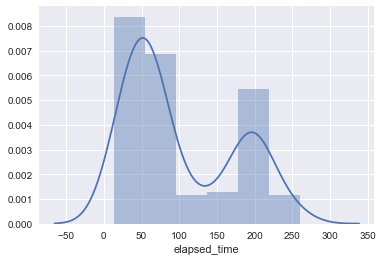

In [108]:
sns.distplot(combined_clean.elapsed_time)

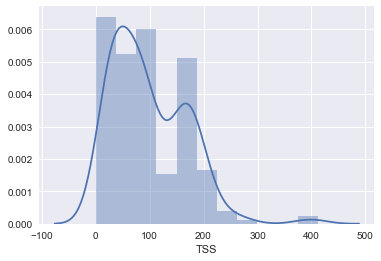

In [109]:
sns.distplot(combined_clean.TSS)

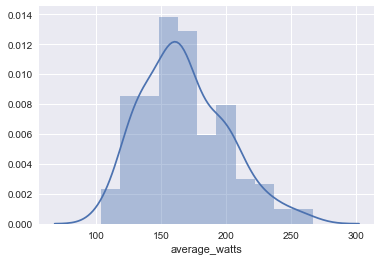

In [110]:
sns.distplot(combined_clean.average_watts)


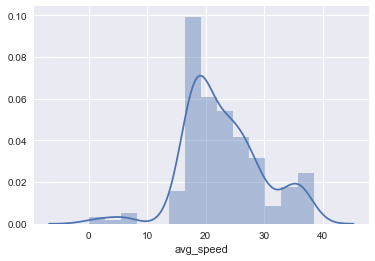

In [111]:
combined_clean['avg_speed'] = combined_clean.distance / (combined_clean.elapsed_time / 60)
sns.distplot(combined_clean.avg_speed)

##### The histogram of Average Speed is left skewed.
##### The histogram of Average Power is normally distributed.
##### The histogram of TSS, Distance and Time are right-skewed.


## Explore the relationships between different variables

In [112]:
features = list(['Distance', 'moving_time', 'avg_speed', 'average_heartrate', 'average_watts', 'NP', 'TSS', 'elevation_gain'])
combined_clean[features].corr()
correlation_mat = combined_clean[features].corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.7]
print(strong_pairs)

average_watts      NP                   0.772574
NP                 average_watts        0.772574
moving_time        TSS                  0.871368
TSS                moving_time          0.871368
                   Distance             0.922541
Distance           TSS                  0.922541
                   moving_time          0.939356
moving_time        Distance             0.939356
Distance           Distance             1.000000
average_heartrate  average_heartrate    1.000000
average_watts      average_watts        1.000000
avg_speed          avg_speed            1.000000
moving_time        moving_time          1.000000
NP                 NP                   1.000000
TSS                TSS                  1.000000
dtype: float64


##### Those pairs whose the correlation coefficient  absolute values > 0.7 is consider to be strong. So it means that  the Training Stress Score is correlated with the Moving Time and also there is a relationship between Moving Time and Distance and between Normalised Power and Average Power.
##### It is viable that the longer the ride (Moving Time), the higher the Training Stress Score and the longer the distance, the longer it take to finish the ride (Moving Time)

## The differences between the three categories: Race, Workout and Ride

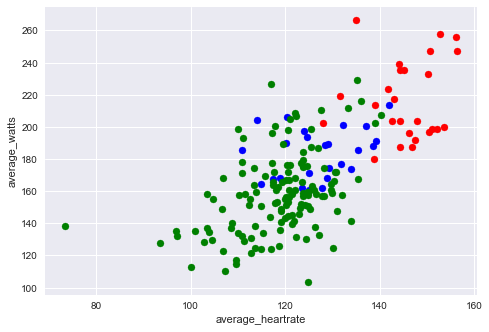

In [113]:
color = ['r','b','g']
workout_type = ['Race','Workout','Ride']
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
for i in range(3):
    point = combined_clean[combined_clean['workout_type']== workout_type[i]]
    average_heartrate = point['average_heartrate'].tolist()
    average_watts = point['average_watts'].tolist()
    ax.scatter(average_heartrate, average_watts, color=color[i])
ax.set_xlabel('average_heartrate')
ax.set_ylabel('average_watts')
plt.show()

##### There’s a clear distinction between Races and Rides in terms of intensity.
##### Workouts overlap slightly with both but focus on mid-range intensity.
##### Higher heart rates correlate with higher power output, especially in races.

## What leads to more kudos ?

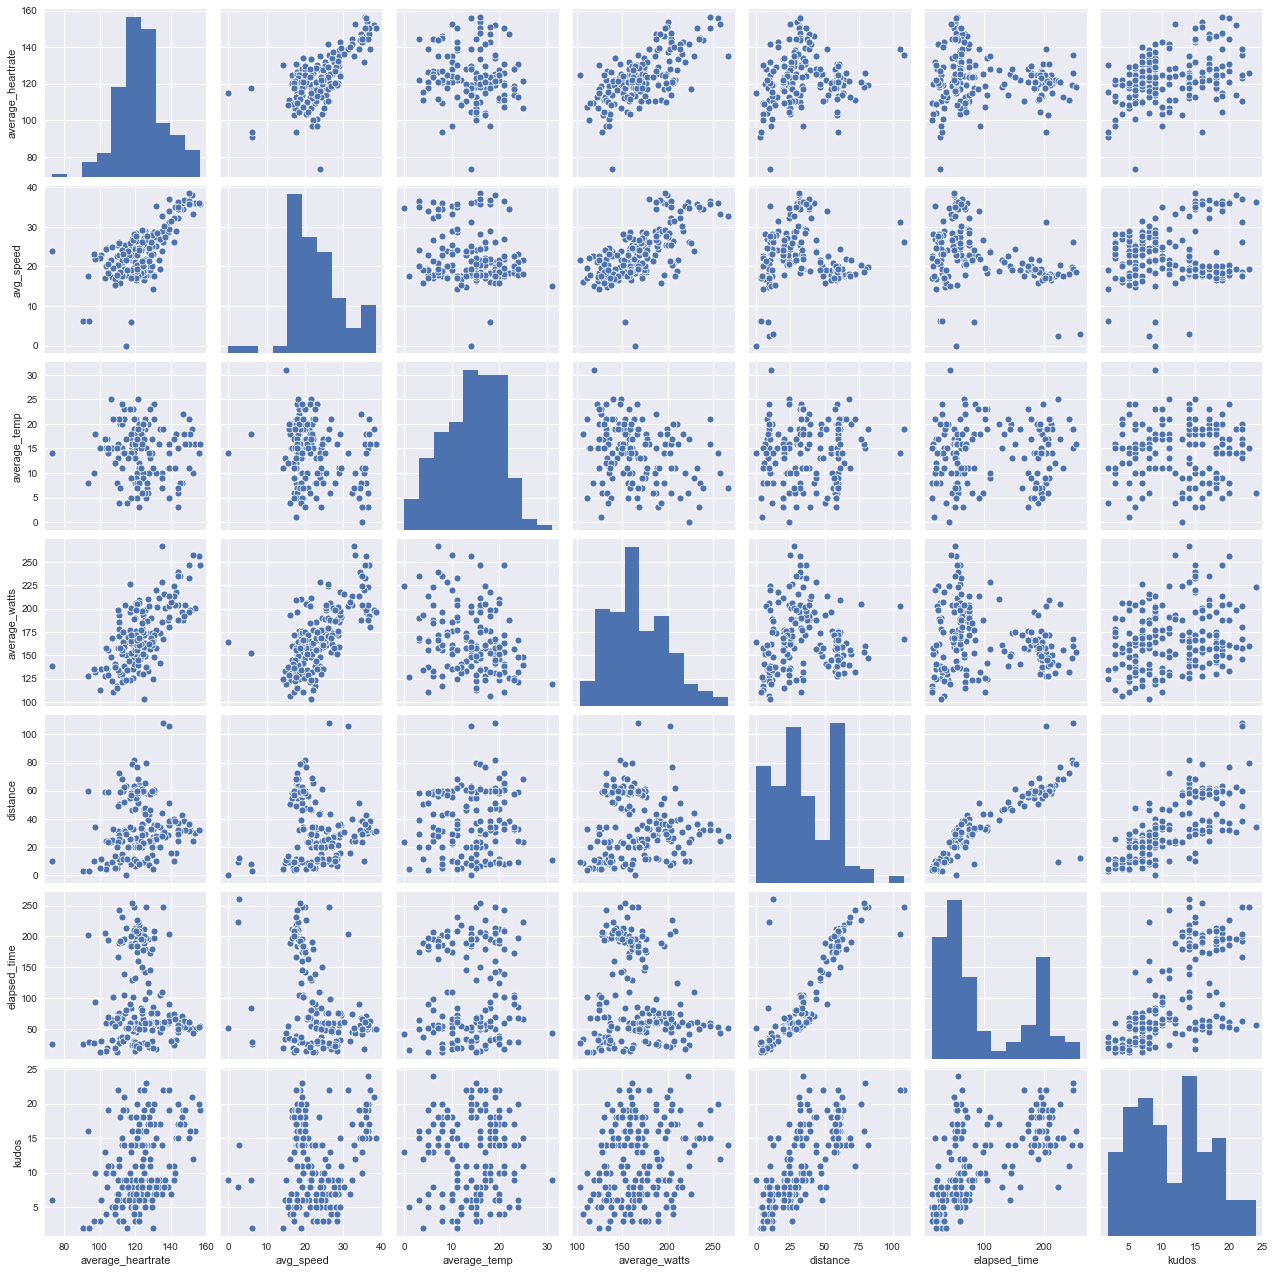

In [51]:
main_var = ['average_heartrate','avg_speed', 'average_temp', 'average_watts', 'distance', 'elapsed_time', 'elevation_gain', 'kudos']
sns.pairplot(combined_clean[main_var])


##### Kudos vs. Distance/Elapsed Time:
###### Longer rides tend to receive more kudos, though the spread suggests variability based on effort or social factors.


## Monthly Training Trends Analysis

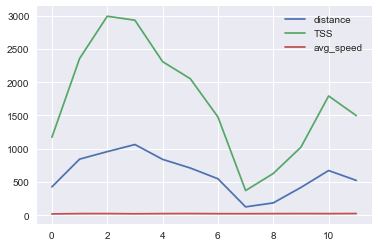

In [53]:

combined_clean['date'] = pd.to_datetime(combined_clean['date'])
combined_clean['month'] = combined_clean['date'].dt.month
combined_clean.groupby('month').agg({'distance':'sum', 'TSS':'sum', 'avg_speed':'mean'}).reset_index()[['distance', 'TSS', 'avg_speed']].plot()
plt.show()

##### Distance & TSS Trends:

###### Both distance and TSS peak around March-April, indicating a period of higher activity and training intensity.
###### There's a noticeable dip around July-August, possibly due to weather, breaks, or reduced training sessions.
###### An uptick toward October-November shows a return to regular or more intense training.

##### Average Speed Stability:

###### The average speed line remains relatively flat throughout the year.
###### This suggests that while the volume and intensity of training fluctuate, the pace remains consistent.
###### Correlation Between Distance & TSS:

###### TSS follows a similar trend to distance, which makes sense since TSS often scales with workout duration and intensity.
